In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import numpy as np
import matplotlib.pyplot as plt
from phantom_functions import create_ptycho_phantom, calculate_wavelength, read_probe_positions_new, convert_positions_to_pixels,set_object_size_pxls, load_data, get_simulated_data, read_probe_positions_in_pxls
from ptycho_functions import RAAR_loop, mPIE_loop,RAAR_multiprobe_loop,PIE_multiprobe_loop, plot_results3, plot_results4, plot_probe_modes, plot_guess_and_model, get_circular_mask

Object pixel size: 2.1962328634132057e-08
Oversampling:  13.493654712810738


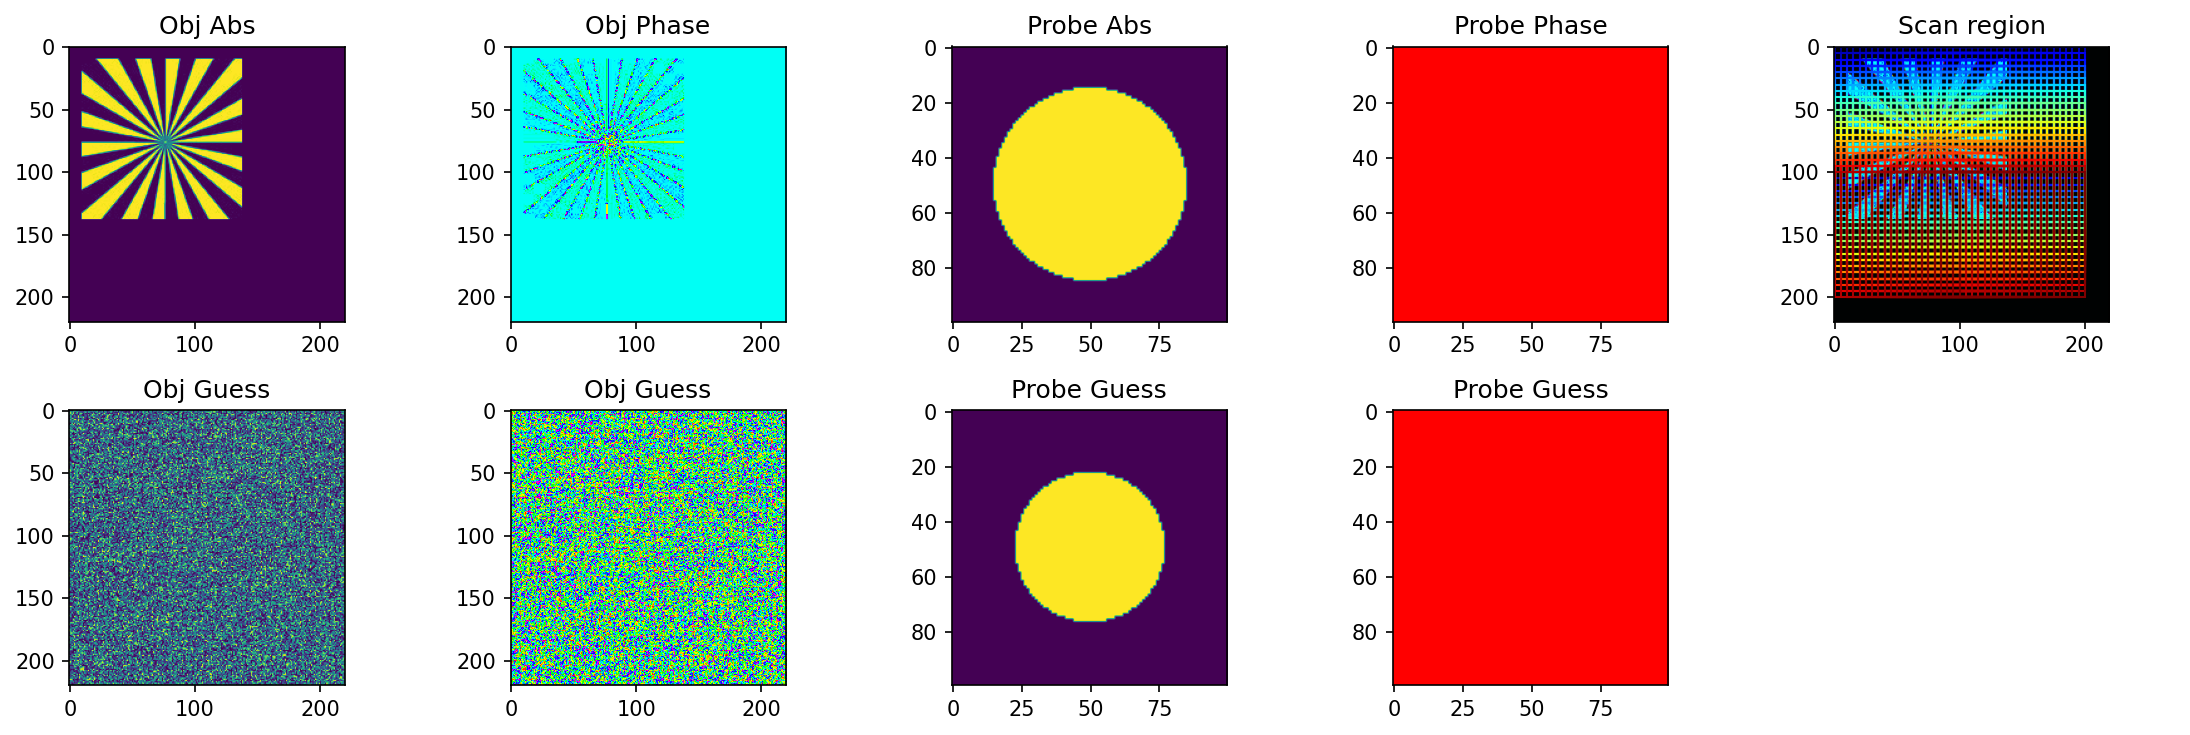

In [2]:
inputs = {
"path" : "/ibira/lnls/labs/tepui/home/yuri.tonin/00000000/data/ptycho3d/complex_phantom/",
"matrix_size": 120, # n of pixels; one side of cube
"n_cpus": 100, # cpu cores
"energy": 6, #keV
"distance": 1, # meter
"detector_pixel": 8*1.25156e-6,
"probe_steps_xy": [5,5], # pixels
"n_of_angles": 0
}

diffraction_patterns, positions, model_obj, model_probe, positions_errors = get_simulated_data(inputs["probe_steps_xy"],random_positions=False,add_position_errors=False,object_offset=10)

""" Experiment Parameters """
c_speed = 299792458        # Velocity of Light [m/s]
planck  = 4.135667662E-18  # Plank constant [keV*s]

position_step = np.max([positions[i]-positions[i-1] for i in range(1,len(positions))])*1e-6
distance = 30  # meters
energy = 10    # keV
n_pixels = 3072
pixel_size = 55.13e-6  # meters
wavelength = c_speed * planck / energy
dx = wavelength*distance/(n_pixels*pixel_size)
oversampling_ratio = wavelength*distance/(position_step*pixel_size)
print('Object pixel size:',dx)
print("Oversampling: ",oversampling_ratio)

experiment_params = dx, wavelength,distance

probe_guess = model_probe*np.exp(-1j*model_probe*2)  
probe_guess = get_circular_mask(model_probe.shape[0],0.3)
# probe_guess = np.ones_like(probe_guess) 

obj_guess = np.ones_like(model_obj) # constant object
obj_guess = np.random.rand(model_obj.shape[0],model_obj.shape[1])+1j

iterations = 100
n_of_modes = 1

# plot_positions_and_errors(data_folder,dataname,offset)
plot_guess_and_model(model_obj,model_probe,obj_guess,probe_guess,positions)

In [ ]:
if 1: 
    """ RAAR """
    inputs['iterations'] = iterations
    inputs['beta'] = 0.995
    inputs['epsilon'] = 0.01 # small value to add to probe/object update denominator
    inputs['pixel_size'] = dx 
    inputs['wavelength'] = wavelength
    inputs['distance'] = distance
    RAAR_obj, RAAR_probe, RAAR_error, RAAR_time = RAAR_loop(diffraction_patterns,positions,obj_guess, probe_guess,inputs)

if 0:
    """ multiprobe RAAR """
    RAAR_params = (beta,epsilon)
    RAAR2_obj, RAAR2_probes, RAAR2_error, RAAR2_time = RAAR_multiprobe_loop(diffraction_patterns,positions,obj_guess, probe_guess, RAAR_params,experiment_params, iterations,model_obj,n_of_modes=n_of_modes)
    RAAR2_probe = RAAR2_probes[0]
else:
    RAAR2_obj, RAAR2_probe, RAAR2_error, RAAR2_time  = RAAR_obj, RAAR_probe, RAAR_error, RAAR_time   



	Iteration 0/100
	Iteration 50/100


In [ ]:
# plot_positions_and_errors(data_folder,dataname,offset,PIE_positions,positions_story)

In [ ]:
plot_results4(diffraction_patterns,model_obj,model_probe,RAAR_obj, RAAR_probe, RAAR_error, RAAR2_obj, RAAR2_probe, RAAR2_error, RAAR2_time, axis=True )
# plot_probe_modes(RAAR2_probes)
plt.show()